In [1]:
# import pandas as pd
# data = pd.read_csv('../data/data.csv')
# data.head()

import pandas as pd
import seaborn as sns
import sqlite3
import csv

# Create the connection
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

unique_species = pd.read_sql_query("SELECT DISTINCT TAXID FROM speciesdb", cnx)
print(unique_species.size)
head = pd.read_sql_query("SELECT * FROM speciesdb", cnx)
head.head()

1667


,TAXID,GENUSNAME,SPECIESNAME,STRAIN,DBNAME,FILEPATH,chromosome_count,avg_length_chromosomes,max_length_chromosomes,min_length_chromosomes,...,max_length_contig,min_length_contig,mtDNA_count,avg_length_mtDNA,max_length_mtDNA,min_length_mtDNA,plasmid_count,avg_length_plasmids,max_length_plasmids,min_length_plasmids
0,4829,absidia,glauca,,ENSEMBLE,/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Absi...,0,0,0,0,...,1790682,221,0,0,0,0,0,0,0,0
1,245562,acidomyces,richmondensis,,ENSEMBLE,/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Acid...,0,0,0,0,...,256309,1017,0,0,0,0,0,0,0,0
2,766039,acidomyces,richmondensis bfw,,ENSEMBLE,/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Acid...,0,0,0,0,...,219268,357,0,0,0,0,0,0,0,0
3,857340,acremonium,chrysogenum atcc 11550,,ENSEMBLE,/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Acre...,0,0,0,0,...,893296,315,1,27766,27766,27766,0,0,0,0
4,597362,agaricus,bisporus var. burnettii jb137-s8,,ENSEMBLE,/u/home/a/akarlsbe/scratch/fungi/ENSEMBLE/Agar...,0,0,0,0,...,3023116,509,0,0,0,0,0,0,0,0


# NCBI

277
NCBI species with only chromosomes: 65
NCBI species with only contigs: 193
NCBI that contain both chromosomes and contigs: 10


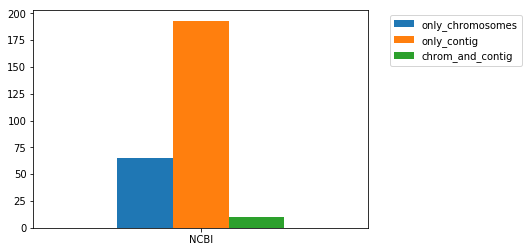

In [2]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi_chr = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count == 0", cnx).size
ncbi_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count == 0 AND contig_count >0", cnx).size
chrom_and_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count > 0", cnx).size

ncbi_total = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
print(ncbi_total)

ncbi_dict = {"only_chromosomes": ncbi_chr, "only_contig": ncbi_contig, "chrom_and_contig": chrom_and_contig}
index = {"NCBI"}
df = pd.DataFrame(ncbi_dict, index=index)

# df.legend(bbox_to_anchor=(1.05, 1), loc =2, borderaxespad=0.5)

ax = df.plot.bar(rot=0)
ax.legend(borderaxespad=0.5, loc=2, bbox_to_anchor=(1.05, 1))

# with open('ensemble_dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in ensemble_dict.items():
#        writer.writerow([key, value])
# df = pd.read_csv('ensemble_dict.csv')

print("NCBI species with only chromosomes:", ncbi_chr)
print("NCBI species with only contigs:", ncbi_contig )
print("NCBI that contain both chromosomes and contigs:", chrom_and_contig)



# 1k

1k species with only chromosomes: 15
1k species with only contigs: 978
1k that contain both chromosomes and contigs: 4


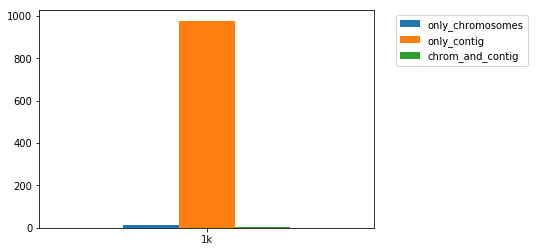

In [3]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

onek_chr = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count == 0", cnx).size
onek_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND chromosome_count == 0 AND contig_count >0", cnx).size
chrom_and_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count > 0", cnx).size


onek_dict = {"only_chromosomes": onek_chr, "only_contig": onek_contig, "chrom_and_contig": chrom_and_contig}
index = {"1k"}
df = pd.DataFrame(onek_dict, index=index)
ax = df.plot.bar(rot=0)
ax.legend(borderaxespad=0.5, loc=2, bbox_to_anchor=(1.05, 1))

# with open('ensemble_dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in ensemble_dict.items():
#        writer.writerow([key, value])
# df = pd.read_csv('ensemble_dict.csv')

print("1k species with only chromosomes:", onek_chr)
print("1k species with only contigs:", onek_contig )
print("1k that contain both chromosomes and contigs:", chrom_and_contig)

# Combined DNA Type Breakdown (ENSEMBL, 1K, NCBI)

In [4]:
        # [ENSEMBLE, NCBI, 1k]
only_chr = [150, 65, 15]
only_contig = [618, 193, 978]
contig_and_chr = [43,10,4]

    # Chr. Contig. Mix of Chrom and Contig.
ENS = [150, 618, 43]
NCBI = [65, 193, 10]
ONEK = [15, 978, 4]
index = ['ENSEMBL', 'NCBI', '1K']


# df = pd.DataFrame({'Ensembl': only_chr,'NCBI': only_contig, '1K': contig_and_chr}, index=index)
# ax = df.plot.bar(rot=0, figsize=(10, 8))




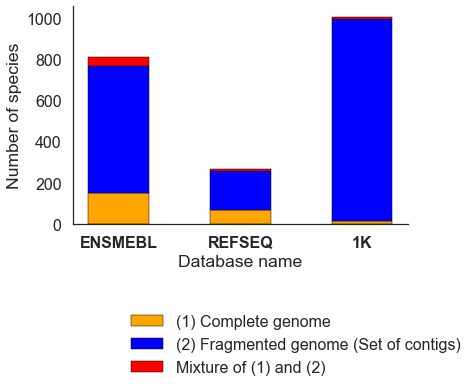

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
#rc('font', weight='bold')

    # [ENSEMBLE, NCBI, 1k]
chrom = [150, 65, 15]
contig = [618, 193, 978]
chrom_and_contig = [43,10,14] #should be 4 not 14. Did this for graphic

# Heights of chrom + contig
bars = [768, 258, 993]

# The position of the bars on the x-axis
r = [0,2,4]
 
# Names of group and bar width
names = ['ENSMEBL','REFSEQ','1K']
barWidth = 1
 
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

# Create yellow bars default bar on bottom for chromosomes
p1 = plt.bar(r, chrom, color='orange', edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the firs ones for contigs
p2 = plt.bar(r, contig, bottom=chrom, color='blue', edgecolor='black', width=barWidth)
# Create blue bars (top)
p3 = plt.bar(r, chrom_and_contig, bottom=bars, color='red', edgecolor='black', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")
 
# Custom Y axis
plt.ylabel("Number of species")

#  legend
plt.legend((p1[0], p2[0], p3[0]), ('(1) Complete genome', '(2) Fragmented genome (Set of contigs)', 'Mixture of (1) and (2)'), bbox_to_anchor=(1.2, -0.35),frameon=False)





g=sns.despine()
plt.savefig("contigs.vs.chr.pdf", bbox_inches='tight')

# Mitochondria Composition

ensembl_species 811
277
1060
ensembl_mt_species 158
NCBI_mt_species 47
OneK_mt_species 0
[19.482120838471022, 16.967509025270758, 0.0]
[80.51787916152898, 83.03249097472924, 100.0]


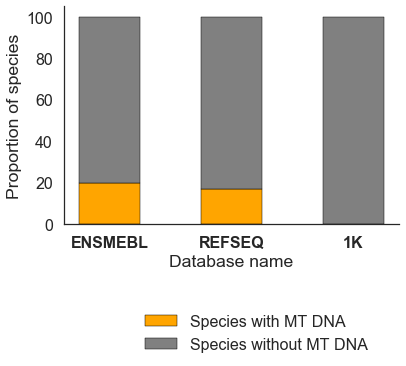

In [8]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ensembl_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
NCBI_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
OneK_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K'", cnx).size


ensembl_mt_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE' AND mtDNA_count > 0", cnx).size
NCBI_mt_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND mtDNA_count > 0", cnx).size
OneK_mt_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND mtDNA_count > 0", cnx).size



prop_ensembl_with_mt = (ensembl_mt_species / float(ensembl_species) ) * 100.0
prop_NCBI_with_mt = (NCBI_mt_species / float(NCBI_species) ) * 100.0
prop_1K_with_mt = (OneK_mt_species / float(OneK_species) ) * 100.0


print("ensembl_species",ensembl_species)
print(NCBI_species)
print(OneK_species)

print("ensembl_mt_species",ensembl_mt_species)
print("NCBI_mt_species",NCBI_mt_species)
print("OneK_mt_species",OneK_mt_species)

    # [ENSEMBLE, NCBI, 1k]
proportion_mt = [prop_ensembl_with_mt, prop_NCBI_with_mt, prop_1K_with_mt]
proportion_no_mt = [100 - prop_ensembl_with_mt, 100 - prop_NCBI_with_mt, 100 - prop_1K_with_mt ]

print(proportion_mt)
print(proportion_no_mt)


# The position of the bars on the x-axis
r = [0,2,4]
 
# Names of group and bar width
names = ['ENSMEBL','REFSEQ','1K']
barWidth = 1
 

g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for chromosomes
p1 = plt.bar(r, proportion_mt, color='orange', edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the firs ones for contigs
p2 = plt.bar(r, proportion_no_mt, bottom=proportion_mt, color='grey', edgecolor='black', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")
 
# Custom Y axis
plt.ylabel("Proportion of species")

#  legend
plt.legend((p1[0], p2[0]), ('Species with MT DNA', 'Species without MT DNA'),bbox_to_anchor=(0.95, -0.35),frameon=False)



g=sns.despine()
plt.savefig("MT.pdf", bbox_inches='tight')



# Plasmid Composition 

811
277
1060
77
1
0


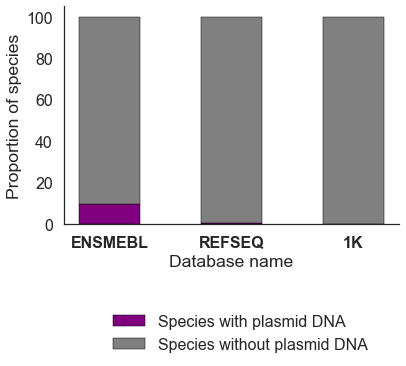

In [7]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ensembl_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
NCBI_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
OneK_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K'", cnx).size


ensembl_plasmid_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE' AND plasmid_count > 0", cnx).size
NCBI_plasmid_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND plasmid_count > 0", cnx).size
OneK_plasmid_species = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND plasmid_count > 0", cnx).size


prop_ensembl_with_plasmid = (ensembl_plasmid_species / float(ensembl_species) ) * 100
prop_NCBI_with_plasmid = (NCBI_plasmid_species / float(NCBI_species) ) * 100
prop_1K_with_plasmid = (OneK_plasmid_species / float(OneK_species) ) * 100


print(ensembl_species)
print(NCBI_species)
print(OneK_species)

print(ensembl_plasmid_species)
print(NCBI_plasmid_species)
print(OneK_plasmid_species)

    # [ENSEMBLE, NCBI, 1k]
proportion_plasmid = [prop_ensembl_with_plasmid, prop_NCBI_with_plasmid, prop_1K_with_plasmid]
proportion_no_plasmid = [100 - prop_ensembl_with_plasmid, 100 - prop_NCBI_with_plasmid, 100 - prop_1K_with_plasmid ]

# The position of the bars on the x-axis
r = [0,2,4]
 
# Names of group and bar width
names = ['ENSMEBL','REFSEQ','1K']
barWidth = 1
 

g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for plasmid dna
p1 = plt.bar(r, proportion_plasmid, color='purple', edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the first ones for other
p2 = plt.bar(r, proportion_no_plasmid, bottom=proportion_plasmid, color='grey', edgecolor='black', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")
 
# Custom Y axis
plt.ylabel("Proportion of species")

#  legend
plt.legend((p1[0], p2[0]), ('Species with plasmid DNA', 'Species without plasmid DNA'),bbox_to_anchor=(0.95, -0.35),frameon=False)



g=sns.despine()
plt.savefig("plasmid.pdf", bbox_inches='tight')




/# PIE CHART  COMPOSITION: Species count and Genus

In [16]:
# import pandas as pd
# import seaborn as sns
# import sqlite3
# import csv
# cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

# ensembl_species = pd.read_sql_query("SELECT DISTINCT TAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
# NCBI_species = pd.read_sql_query("SELECT DISTINCT TAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
# OneK_species = pd.read_sql_query("SELECT DISTINCT TAXID FROM speciesdb where dbname = '1K'", cnx).size

# print("SpeciesCount")

# print(ensembl_species)
# print(NCBI_species)
# print(OneK_species)

# ensembl_genus = pd.read_sql_query("SELECT DISTINCT GenusName FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
# NCBI_genus = pd.read_sql_query("SELECT DISTINCT GenusName FROM speciesdb where dbname = 'NCBI'", cnx).size
# OneK_genus = pd.read_sql_query("SELECT DISTINCT GenusName FROM speciesdb where dbname = '1K'", cnx).size

# print("GenusCount")
# print(ensembl_genus)
# print(NCBI_genus)
# print(OneK_genus)


# df = pd.DataFrame({'NumSpecies': [ensembl_species, NCBI_species , OneK_species],'NumGenus': [ensembl_genus, NCBI_genus,OneK_genus]},
#                   index=['Ensembl', 'NCBI', '1K'])
# # plot = df.plot.pie(y='NumSpecies', figsize=(8, 8))
# # plot = df.plot.pie(subplots=True, figsize=(16, 8))

# plot = df.plot.pie(autopct='%1.0f%%', labeldistance=1.2, fontsize=10, subplots=True, figsize=(16, 8))

# Number of species that have Mitochondrial DNA in each database

In [9]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

ensembl_mt = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE' AND mtDNA_count > 0", cnx).size
NCBI_mt = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND mtDNA_count > 0", cnx).size
OneK_mt = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND mtDNA_count > 0", cnx).size

print(ensembl_mt)
print(NCBI_mt)
print(OneK_mt)


158
47
0


# SPECIES contained in three, two and one database: PIE CHART

258
38
53
1292
349
26
157
681
454


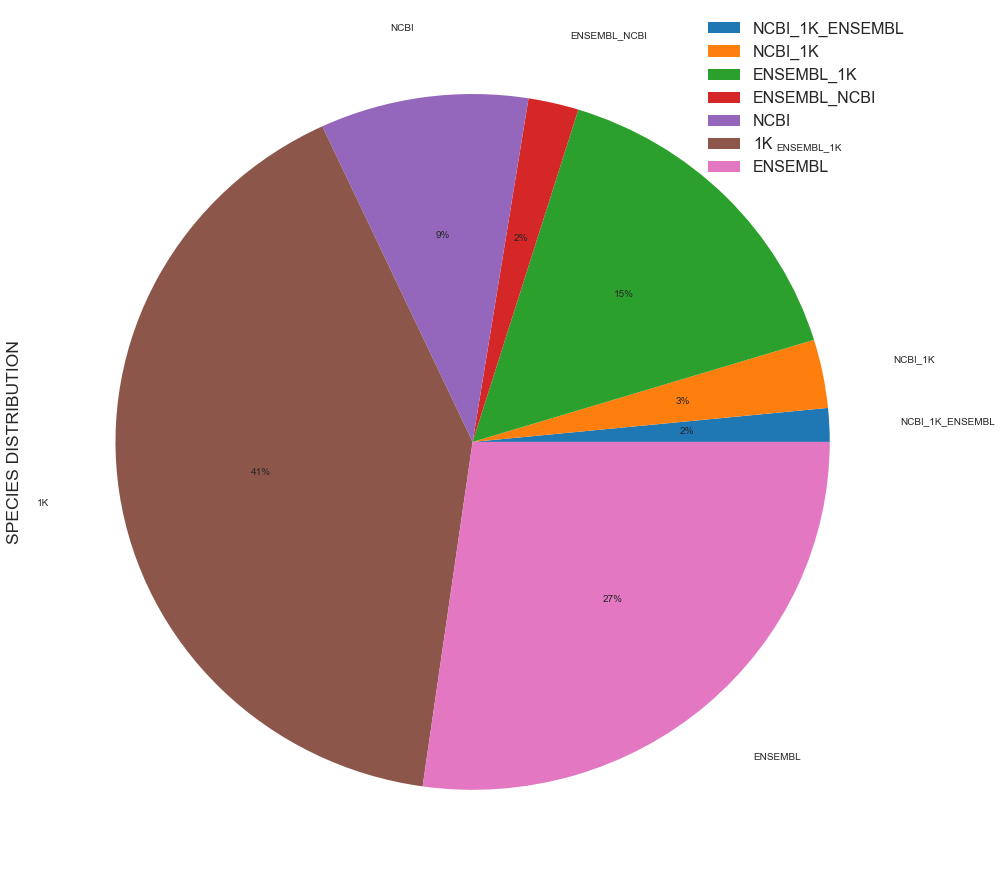

In [10]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

occur_once = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

ENSEMBLE_NCBI = 0
ENSEMBLE_1K = 0
NCBI_1K = 0

for index, row in occur_twice.iterrows():
    taxid = row["TAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE TAXID = {taxid}", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K += 1
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI += 1
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K += 1        

print(ENSEMBLE_1K)
print(ENSEMBLE_NCBI)
print(NCBI_1K)



print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)


NCBI = pd.read_sql_query("SELECT DISTINCT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK = pd.read_sql_query("SELECT DISTINCT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL = pd.read_sql_query("SELECT DISTINCT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)                        

df = pd.DataFrame({'SPECIES DISTRIBUTION': [occur_thrice.size, NCBI_1K, ENSEMBLE_1K, ENSEMBLE_NCBI, NCBI.size, ONEK.size, ENSEMBL.size]},
                  index=['NCBI_1K_ENSEMBL', 'NCBI_1K', 'ENSEMBL_1K', 'ENSEMBL_NCBI', 'NCBI', '1K', 'ENSEMBL'])
# plot = df.plot.pie(y='NumSpecies', figsize=(8, 8))
# plot = df.plot.pie(subplots=True, figsize=(16, 8))

plot = df.plot.pie(autopct='%1.0f%%', labeldistance=1.2, fontsize=10, subplots=True, figsize=(16, 16))


# Species contained in three, two and one database: Venn Diagram

258
38
53
1292
349
26
157
681
454


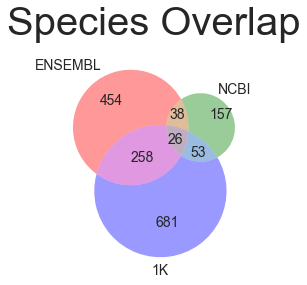

In [12]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

occur_once = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

ENSEMBLE_NCBI = 0
ENSEMBLE_1K = 0
NCBI_1K = 0

for index, row in occur_twice.iterrows():
    taxid = row["TAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE TAXID = {taxid}", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K += 1
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI += 1
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K += 1        

print(ENSEMBLE_1K)
print(ENSEMBLE_NCBI)
print(NCBI_1K)


print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)


NCBI = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)                        

# VENN DIAGRAM
 
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.despine()
# Make the diagram
out = venn3(subsets = (ENSEMBL.size, NCBI.size, ENSEMBLE_NCBI, ONEK.size, ENSEMBLE_1K, NCBI_1K, occur_thrice.size), set_labels = ('ENSEMBL', 'NCBI', '1K'))
plt.title("Species Overlap", fontsize = 40, pad = 20, loc = 'center')

for text in out.set_labels:
    text.set_fontsize(14)
for text in out.subset_labels:
    text.set_fontsize(14)
    

plt.show()


# GENUS contained in three, two and one database: PIE CHART


ENSEMBLE_1K GENUS OVERLAP 91
ENSEMBLE_NCBI GENUS OVERLAP 18
NCBI_1K GENUS OVERLAP 11
true
TOTAL_NUMBER_OF_DISTINCT_GENUSES 668
GENUS_THAT_OCCUR_ONCE 422
GENUS_THAT_OCCUR_TWICE 120
GENUS THAT OCCUR IN ALL THREE DATABASES 126
true
SPECIES THAT OCCUR IN ALL THREE DATABASES 26
   COUNT(Distinct GENUSNAME)    DBNAME
0                        611        1K
1                        270  ENSEMBLE
2                        159      NCBI
DELIM
GENUS_THAT_OCCUR_in_only_one_database 422
NCBI_GENUS_ONLY 4
ONEK_GENUS_ONLY 383
ENSEMBL_GENUS_ONLY 35
true


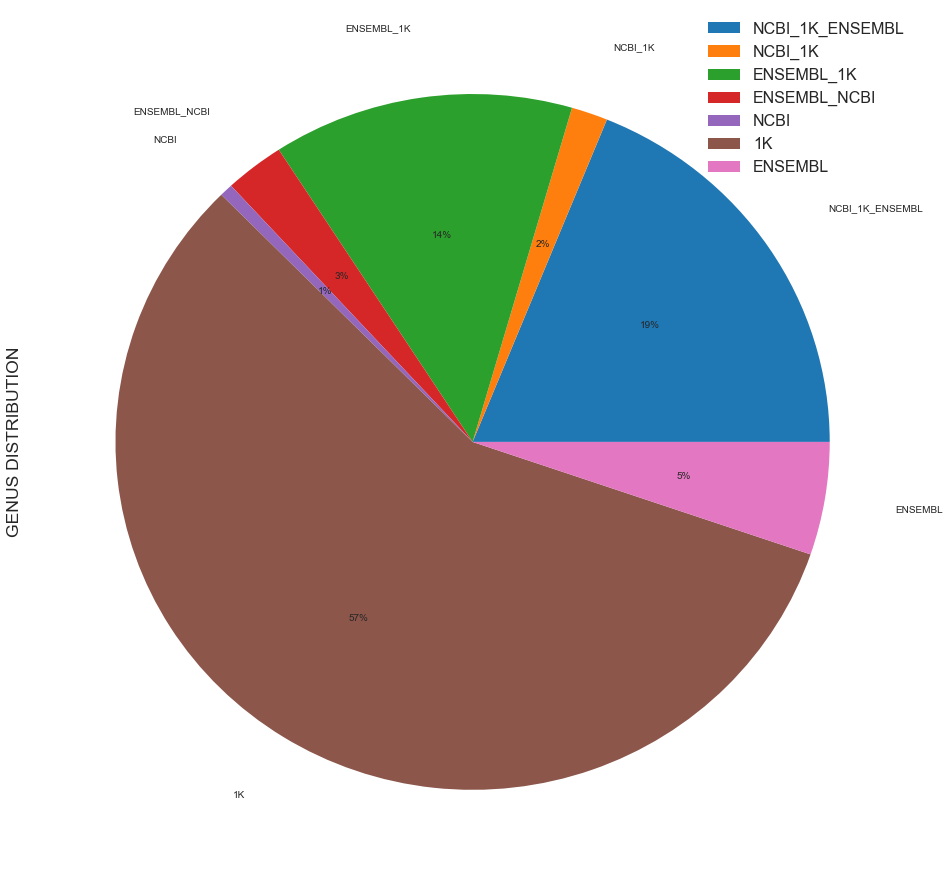

In [20]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

TOTAL_NUMBER_OF_DISTINCT_GENUSES = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB", cnx)

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

GENUS_THAT_OCCUR_TWICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

GENUS_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

ENSEMBLE_NCBI = 0
ENSEMBLE_1K = 0
NCBI_1K = 0

for index, row in GENUS_THAT_OCCUR_TWICE.iterrows():
    genus_name = row["GENUSNAME"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE GENUSNAME = '{genus_name}'", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K += 1
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI += 1
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K += 1        

print('ENSEMBLE_1K GENUS OVERLAP', ENSEMBLE_1K)
print('ENSEMBLE_NCBI GENUS OVERLAP', ENSEMBLE_NCBI)
print('NCBI_1K GENUS OVERLAP', NCBI_1K)
if ENSEMBLE_1K + ENSEMBLE_NCBI + NCBI_1K == GENUS_THAT_OCCUR_TWICE.size:
    print("true")


print('TOTAL_NUMBER_OF_DISTINCT_GENUSES', TOTAL_NUMBER_OF_DISTINCT_GENUSES.size)
print('GENUS_THAT_OCCUR_ONCE', GENUS_THAT_OCCUR_ONCE.size)
print('GENUS_THAT_OCCUR_TWICE', GENUS_THAT_OCCUR_TWICE.size)
print("GENUS THAT OCCUR IN ALL THREE DATABASES",GENUS_THAT_OCCUR_THRICE.size)
if GENUS_THAT_OCCUR_ONCE.size + GENUS_THAT_OCCUR_TWICE.size + GENUS_THAT_OCCUR_THRICE.size == TOTAL_NUMBER_OF_DISTINCT_GENUSES.size:
    print("true")


SPECIES_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)
print("SPECIES THAT OCCUR IN ALL THREE DATABASES",SPECIES_THAT_OCCUR_THRICE.size)

    
# GENUS_THAT_OCCUR_THRICE.head()
# print(SPECIES_THAT_OCCUR_THRICE.head())
    
Distinct_genuses_in_each_databses = pd.read_sql_query("SELECT COUNT(Distinct GENUSNAME), DBNAME FROM SPECIESDB group by DBNAME ", cnx)
print(Distinct_genuses_in_each_databses)
    
print("DELIM")

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

NCBI_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

print('GENUS_THAT_OCCUR_in_only_one_database',GENUS_THAT_OCCUR_ONCE.size)
print('NCBI_GENUS_ONLY',NCBI_GENUS_ONLY.size)
print('ONEK_GENUS_ONLY',ONEK_GENUS_ONLY.size)
print('ENSEMBL_GENUS_ONLY',ENSEMBL_GENUS_ONLY.size) 
if NCBI_GENUS_ONLY.size + ONEK_GENUS_ONLY.size + ENSEMBL_GENUS_ONLY.size == GENUS_THAT_OCCUR_ONCE.size:
    print("true")

    
# PIE CHART 
df = pd.DataFrame({'GENUS DISTRIBUTION': [GENUS_THAT_OCCUR_THRICE.size, NCBI_1K, ENSEMBLE_1K, ENSEMBLE_NCBI, NCBI_GENUS_ONLY.size, ONEK_GENUS_ONLY.size, ENSEMBL_GENUS_ONLY.size]},
                  index=['NCBI_1K_ENSEMBL', 'NCBI_1K', 'ENSEMBL_1K', 'ENSEMBL_NCBI', 'NCBI', '1K', 'ENSEMBL'])
# plot = df.plot.pie(y='NumSpecies', figsize=(8, 8))
# plot = df.plot.pie(subplots=True, figsize=(16, 8))

plot = df.plot.pie(autopct='%1.0f%%', labeldistance=1.2, fontsize=10, subplots=True, figsize=(16, 16))


# GENUS contained in three, two and one database: Venn Diagram


ENSEMBLE_1K GENUS OVERLAP 91
ENSEMBLE_NCBI GENUS OVERLAP 18
NCBI_1K GENUS OVERLAP 11
true
TOTAL_NUMBER_OF_DISTINCT_GENUSES 668
GENUS_THAT_OCCUR_ONCE 422
GENUS_THAT_OCCUR_TWICE 120
GENUS THAT OCCUR IN ALL THREE DATABASES 126
true
SPECIES THAT OCCUR IN ALL THREE DATABASES 26
   COUNT(Distinct GENUSNAME)    DBNAME
0                        611        1K
1                        270  ENSEMBLE
2                        159      NCBI
DELIM
GENUS_THAT_OCCUR_in_only_one_database 422
NCBI_GENUS_ONLY 4
ONEK_GENUS_ONLY 383
ENSEMBL_GENUS_ONLY 35
true


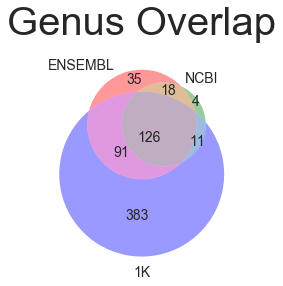

In [13]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

TOTAL_NUMBER_OF_DISTINCT_GENUSES = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB", cnx)

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

GENUS_THAT_OCCUR_TWICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

GENUS_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

ENSEMBLE_NCBI = 0
ENSEMBLE_1K = 0
NCBI_1K = 0

for index, row in GENUS_THAT_OCCUR_TWICE.iterrows():
    genus_name = row["GENUSNAME"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE GENUSNAME = '{genus_name}'", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K += 1
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI += 1
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K += 1        

print('ENSEMBLE_1K GENUS OVERLAP', ENSEMBLE_1K)
print('ENSEMBLE_NCBI GENUS OVERLAP', ENSEMBLE_NCBI)
print('NCBI_1K GENUS OVERLAP', NCBI_1K)
if ENSEMBLE_1K + ENSEMBLE_NCBI + NCBI_1K == GENUS_THAT_OCCUR_TWICE.size:
    print("true")


print('TOTAL_NUMBER_OF_DISTINCT_GENUSES', TOTAL_NUMBER_OF_DISTINCT_GENUSES.size)
print('GENUS_THAT_OCCUR_ONCE', GENUS_THAT_OCCUR_ONCE.size)
print('GENUS_THAT_OCCUR_TWICE', GENUS_THAT_OCCUR_TWICE.size)
print("GENUS THAT OCCUR IN ALL THREE DATABASES",GENUS_THAT_OCCUR_THRICE.size)
if GENUS_THAT_OCCUR_ONCE.size + GENUS_THAT_OCCUR_TWICE.size + GENUS_THAT_OCCUR_THRICE.size == TOTAL_NUMBER_OF_DISTINCT_GENUSES.size:
    print("true")


SPECIES_THAT_OCCUR_THRICE = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)
print("SPECIES THAT OCCUR IN ALL THREE DATABASES",SPECIES_THAT_OCCUR_THRICE.size)

    
# GENUS_THAT_OCCUR_THRICE.head()
# print(SPECIES_THAT_OCCUR_THRICE.head())
    
Distinct_genuses_in_each_databses = pd.read_sql_query("SELECT COUNT(Distinct GENUSNAME), DBNAME FROM SPECIESDB group by DBNAME ", cnx)
print(Distinct_genuses_in_each_databses)
    
print("DELIM")

GENUS_THAT_OCCUR_ONCE = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

NCBI_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL_GENUS_ONLY = pd.read_sql_query("SELECT DISTINCT GENUSNAME FROM SPECIESDB Group by GENUSNAME HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

print('GENUS_THAT_OCCUR_in_only_one_database',GENUS_THAT_OCCUR_ONCE.size)
print('NCBI_GENUS_ONLY',NCBI_GENUS_ONLY.size)
print('ONEK_GENUS_ONLY',ONEK_GENUS_ONLY.size)
print('ENSEMBL_GENUS_ONLY',ENSEMBL_GENUS_ONLY.size) 
if NCBI_GENUS_ONLY.size + ONEK_GENUS_ONLY.size + ENSEMBL_GENUS_ONLY.size == GENUS_THAT_OCCUR_ONCE.size:
    print("true")

# VENN DIAGRAM
 
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.despine()
# Make the diagram
out = venn3(subsets = (ENSEMBL_GENUS_ONLY.size, NCBI_GENUS_ONLY.size, ENSEMBLE_NCBI, ONEK_GENUS_ONLY.size, ENSEMBLE_1K, NCBI_1K, GENUS_THAT_OCCUR_THRICE.size), set_labels = ('ENSEMBL', 'NCBI', '1K'))
plt.title("Genus Overlap", fontsize = 40, pad = 20, loc = 'center')

for text in out.set_labels:
    text.set_fontsize(14)
for text in out.subset_labels:
    text.set_fontsize(14)
    

plt.show()

# Histogram of length distribution

    CHROMSOMES

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)


NCBI_chr = []
NCBI_contig = []
ONEK_chr = []
ONEK_contig = []
ENSEMBL_chr = []
ENSEMBL_contig  = []

for index, row in ncbi.iterrows():
     NCBI_chr.append(row["avg_length_chromosomes"])
     NCBI_contig.append(row["avg_length_contig"])

for index, row in onek.iterrows():
     ONEK_chr.append(row["avg_length_chromosomes"])
     ONEK_contig.append(row["avg_length_contig"])
        
for index, row in ensembl.iterrows():
     ENSEMBL_chr.append(row["avg_length_chromosomes"])
     ENSEMBL_contig.append(row["avg_length_contig"])
        
        
        
file=open('chr.length.csv','w')
file.write('db,type,length\n')

for i in NCBI_chr:
    if i!=0:
        file.write('REFSEQ,chr,'+str(i))
        file.write("\n")

for i in NCBI_contig:
    if i!=0:
        file.write('REFSEQ,contig,'+str(i))
        file.write("\n")

for i in ENSEMBL_chr:
    if i!=0:
        file.write('ENSEMBL,chr,'+str(i))
        file.write("\n")

for i in ENSEMBL_contig:
    if i!=0:
        file.write('ENSEMBL,contig,'+str(i))
        file.write("\n")
        
for i in ONEK_chr:
    if i!=0:
        file.write('1K,chr,'+str(i))
        file.write("\n")

for i in ONEK_contig:
    if i!=0:
        file.write('1K,contig,'+str(i))
        file.write("\n")
        
file.close()

In [15]:
import pandas as pd
data=pd.read_csv('chr.length.csv')
data.tail()

,db,type,length
2123,1K,contig,45336
2124,1K,contig,1253363
2125,1K,contig,36778
2126,1K,contig,5333
2127,1K,contig,28426


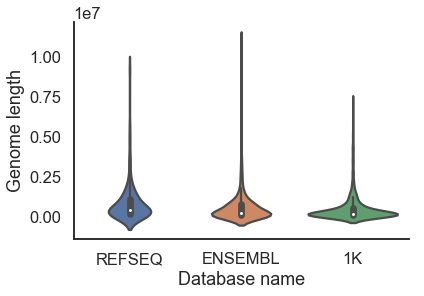

In [130]:
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")

ax = sns.violinplot(y="length", x="db", data=data)
ax.set(ylabel='Genome length', xlabel='Database name')


g=sns.despine()
plt.savefig("genome.length.pdf", bbox_inches='tight')

    CONTIGS

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


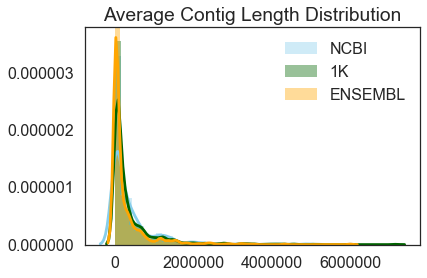

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)


NCBI = []
ONEK = []
ENSEMBL = []

for index, row in ncbi.iterrows():
     NCBI.append(row["avg_length_contig"])

for index, row in onek.iterrows():
     ONEK.append(row["avg_length_contig"])
        
for index, row in ensembl.iterrows():
     ENSEMBL.append(row["avg_length_contig"])

sns.distplot( NCBI , color="skyblue", label="NCBI")
sns.distplot( ONEK , color="darkgreen", label="1K")
sns.distplot( ENSEMBL , color="orange", label="ENSEMBL")
plt.legend()
plt.title("Average Contig Length Distribution")
plt.show()

    MITOCHONDRIA

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.war

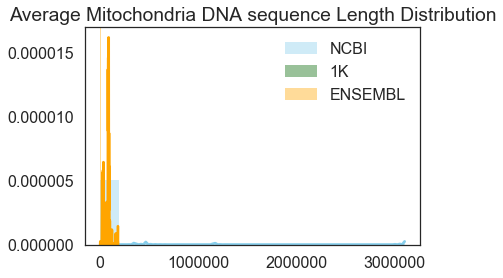

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)


NCBI = []
ONEK = []
ENSEMBL = []

for index, row in ncbi.iterrows():
     NCBI.append(row["avg_length_mtDNA"])

for index, row in onek.iterrows():
     ONEK.append(row["avg_length_mtDNA"])
        
for index, row in ensembl.iterrows():
     ENSEMBL.append(row["avg_length_mtDNA"])

sns.distplot( NCBI , color="skyblue", label="NCBI")
sns.distplot( ONEK , color="darkgreen", label="1K")
sns.distplot( ENSEMBL , color="orange", label="ENSEMBL")
plt.legend()
plt.title("Average Mitochondria DNA sequence Length Distribution")
plt.show()

    PLASMIDS

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.war

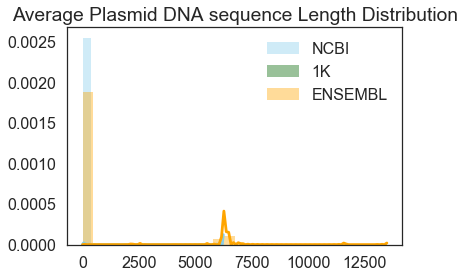

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

ncbi = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM SPECIESDB WHERE DBNAME = 'ENSEMBLE'", cnx)


NCBI = []
ONEK = []
ENSEMBL = []

for index, row in ncbi.iterrows():
     NCBI.append(row["avg_length_plasmids"])

for index, row in onek.iterrows():
     ONEK.append(row["avg_length_plasmids"])
        
for index, row in ensembl.iterrows():
     ENSEMBL.append(row["avg_length_plasmids"])

sns.distplot( NCBI , color="skyblue", label="NCBI")
sns.distplot( ONEK , color="darkgreen", label="1K")
sns.distplot( ENSEMBL , color="orange", label="ENSEMBL")
plt.legend()
plt.title("Average Plasmid DNA sequence Length Distribution")
plt.show()

# shared in two: chrom and contig vs chrom chrom vs cont and cont
    # Comare if dna types are the same or different  for species present in two 

In [75]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

occur_twice = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)
# print(occur_twice.size)


ENSEMBLE_NCBI = []
ENSEMBLE_1K = []
NCBI_1K = []

for index, row in occur_twice.iterrows():
    taxid = row["TAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE TAXID = {taxid}", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K.append(taxid)
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI.append(taxid)
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K.append(taxid)    
        
# print(len(ENSEMBLE_1K))
# print(len(ENSEMBLE_NCBI))
# print(len(NCBI_1K))


# COMPARE ENSEMBLE AND 1K

for taxid in ENSEMBLE_1K:
    databases = pd.read_sql_query(f"SELECT TAXID, DBNAME, chromosome_count, contig_count, mtdna_count, plasmid_count FROM SPECIESDB WHERE TAXID = {taxid} ", cnx)
    print(databases)
    print("------------")


# # COMPARE ENSEMBLE AND NCBI
for taxid in ENSEMBLE_NCBI:
    databases = pd.read_sql_query(f"SELECT TAXID, DBNAME, chromosome_count, contig_count, mtdna_count, plasmid_count FROM SPECIESDB WHERE TAXID = {taxid} ", cnx)
    print(databases)
    print("------------")



# # COMPARE NCBI AND 1K
for taxid in NCBI_1K:
    databases = pd.read_sql_query(f"SELECT TAXID, DBNAME, chromosome_count, contig_count, mtdna_count, plasmid_count FROM SPECIESDB WHERE TAXID = {taxid} ", cnx)
    print(databases)
    print("------------")
    


349
258
38
53
   TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  plasmid_count
0   5078  ENSEMBLE                 0            92            0              0
1   5078        1K                 0            92            0              0
------------
   TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  plasmid_count
0   5353  ENSEMBLE                 0          1951            0              0
1   5353        1K                 0           128            0              0
------------
   TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  plasmid_count
0   5454  ENSEMBLE                 0           338            0              0
1   5454        1K                 0           338            0              0
------------
   TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  plasmid_count
0   5580  ENSEMBLE                 0          1352            0              0
1   5580        1K                 0           186            0              0

    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  322104  ENSEMBLE                 8             0            0   
1  322104        1K                 9             0            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  330879  ENSEMBLE                 8             0            0   
1  330879        1K                 0             0            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  331117  ENSEMBLE                 0           438            0   
1  331117        1K                 0             0            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  332952  ENSEMBLE                 0           331            0   
1  332952        1K                 0  

    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  573729  ENSEMBLE                 7             0            0   
1  573729        1K                 7             0            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  578456  ENSEMBLE                 0            45            0   
1  578456        1K                 0            45            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  578457  ENSEMBLE                 0            46            0   
1  578457        1K                 0            36            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  578459  ENSEMBLE                 0            26            0   
1  578459        1K                 0  

    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  708197  ENSEMBLE                 0          1046            0   
1  708197        1K                 0          1046            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  717646  ENSEMBLE                 0            19            0   
1  717646        1K                 0            19            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  717944  ENSEMBLE                 0           283            0   
1  717944        1K                 0           283            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  721885  ENSEMBLE                 0           159            0   
1  721885        1K                 0  

    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  936435  ENSEMBLE                 0          2120            0   
1  936435        1K                 0          2128            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  944288  ENSEMBLE                 0           316            0   
1  944288        1K                 0           316            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  944289  ENSEMBLE                 0           383            0   
1  944289        1K                 0           383            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  945553  ENSEMBLE                 0           704            0   
1  945553        1K                 0  

     TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  1170230  ENSEMBLE                 0            53            1   
1  1170230        1K                 0           561            0   

   plasmid_count  
0              0  
1              0  
------------
     TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  1173701  ENSEMBLE                 0          1625            0   
1  1173701        1K                 0          1434            0   

   plasmid_count  
0              0  
1              0  
------------
     TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  1178016  ENSEMBLE                10             3            0   
1  1178016        1K                13             0            0   

   plasmid_count  
0              0  
1              0  
------------
     TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  1182541  ENSEMBLE                 0            11            0   
1  1182541        1K        

     TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  1388766  ENSEMBLE                 0           110            0   
1  1388766        1K                 0           110            0   

   plasmid_count  
0              0  
1              0  
------------
     TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  1391700  ENSEMBLE                 0            42            0   
1  1391700        1K                 0            42            0   

   plasmid_count  
0              0  
1              0  
------------
     TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  1442368  ENSEMBLE                 0            11            0   
1  1442368        1K                 0            11            0   

   plasmid_count  
0              0  
1              0  
------------
     TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  1442370  ENSEMBLE                 0            60            0   
1  1442370        1K        

    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  460519  ENSEMBLE                 4             2            0   
1  460519      NCBI                 4             0            0   

   plasmid_count  
0              1  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  460523  ENSEMBLE                 0             7            0   
1  460523      NCBI                 0             7            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  498019  ENSEMBLE                 0            99            0   
1  498019      NCBI                99             0            0   

   plasmid_count  
0              0  
1              0  
------------
    TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  \
0  563466  ENSEMBLE                 0           176            0   
1  563466      NCBI               176  

# shared in Three:  chrom and contig vs chrom chrom vs cont and cont 
    # Comare if dna types are the same or different for species present in three

In [66]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

occur_thrice = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

for index, row in occur_thrice.iterrows():
    taxid = row["TAXID"]
    databases = pd.read_sql_query(f"SELECT TAXID, DBNAME, chromosome_count, contig_count, mtdna_count, plasmid_count FROM SPECIESDB WHERE TAXID = {taxid} ", cnx)
    print(databases)
    print("------------")

   TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  plasmid_count
0   4932  ENSEMBLE                 2             0            0              0
1   4932  ENSEMBLE                16            14            1              1
2   4932  ENSEMBLE                 0           236            0              0
3   4932      NCBI                16             0            1              0
4   4932        1K                 0           596            0              0
------------
   TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  plasmid_count
0   4950  ENSEMBLE                 8             0            0              0
1   4950      NCBI                 8             0            0              0
2   4950        1K                 0             8            0              0
------------
   TAXID    DBNAME  chromosome_count  contig_count  mtDNA_count  plasmid_count
0   4952  ENSEMBLE                 6             0            1              0
1   4952      NCBI        

# For the species that have the same dna types in each db, account for the cases where the species have different numbers of contigs and chromosomes between each database